## DSTA 2022-23 Model Coursework solution 

Student Name - Darshana Gopal

Student ID - 13915315

#### Academic Declaration: 
“I have read and understood the sections of plagiarism in the College Policy on assessment offences and confirm that the work is my own, with the work of others clearly acknowledged. I give my permission to submit my report to the plagiarism testing database that the College is using and test it using plagiarism detection software, search engines or meta-searching software.“



<div style="background-color: #FDF5E6; padding: 10px;">



Contents 

1. Introduction
2. Phase 1: Data Source
3. Phase 2: Dimensional analysis¶

- (a) Columns and their data types
- (b) Data Duplicates
- (c) Number of data points
- (d) Null data points
- (e) Range of each dimension
- (f) Quality of the data
- (g) Pie Chart

(h) Section analysis

4. Phase 3A: Select three dimensions that could be used as predictors and a fourth dimension as predicted
1. Mutual Information Gain
2. VarianceThreshold
3. Correlation matrix

5. Phase 3B: Visualise the values of the predictor dimensions and the predicted dimension.

6. Phase 3C: Predict the class of the diagnosis using the selected features.

7. Phase 4: Reduction of the dimensions using PCA and prediction of class of the diagnosis

8. Phase 5: Compare the quality of prediction between the results of phase 3 and phase 4
</div>

#### 1. Introduction 

Breast cancer is a dangerous disease for women. Whether the tumour is benign or malignant is determined by pathological examination. Benign tumour is non-cancerous whereas malignant is cancerous. The "Diagnostic Wisconsin Breast Cancer Database" (https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data) is a publicly available data set from the Kaggle. The dataset gives information about the tumor features, that are computed from a digitised image of a fine needle aspirate (FNA) of a breast mass. The below analysis aims to classify cancer cells into classes - malignant and benign using 3 features from the dataset.

#### 2. Phase 1: Data Source

The "Diagnostic Wisconsin Breast Cancer Database" is a publicly available dataset from Kaggle. 

Please find the link attached - (https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data). 

The dataset contains numerical data, except for the "diagnosis" column, which is the target variable or the predicted dimension.

In [3]:
#Import packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale, normalize
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split  
from sklearn.feature_selection import VarianceThreshold 
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import accuracy_score

In [6]:
data = pd.read_csv('data.csv') #Read data

#### 3. Phase 2: Dimensional analysis
    
(a) Columns and their data types 

Description of columns in the Dataset:
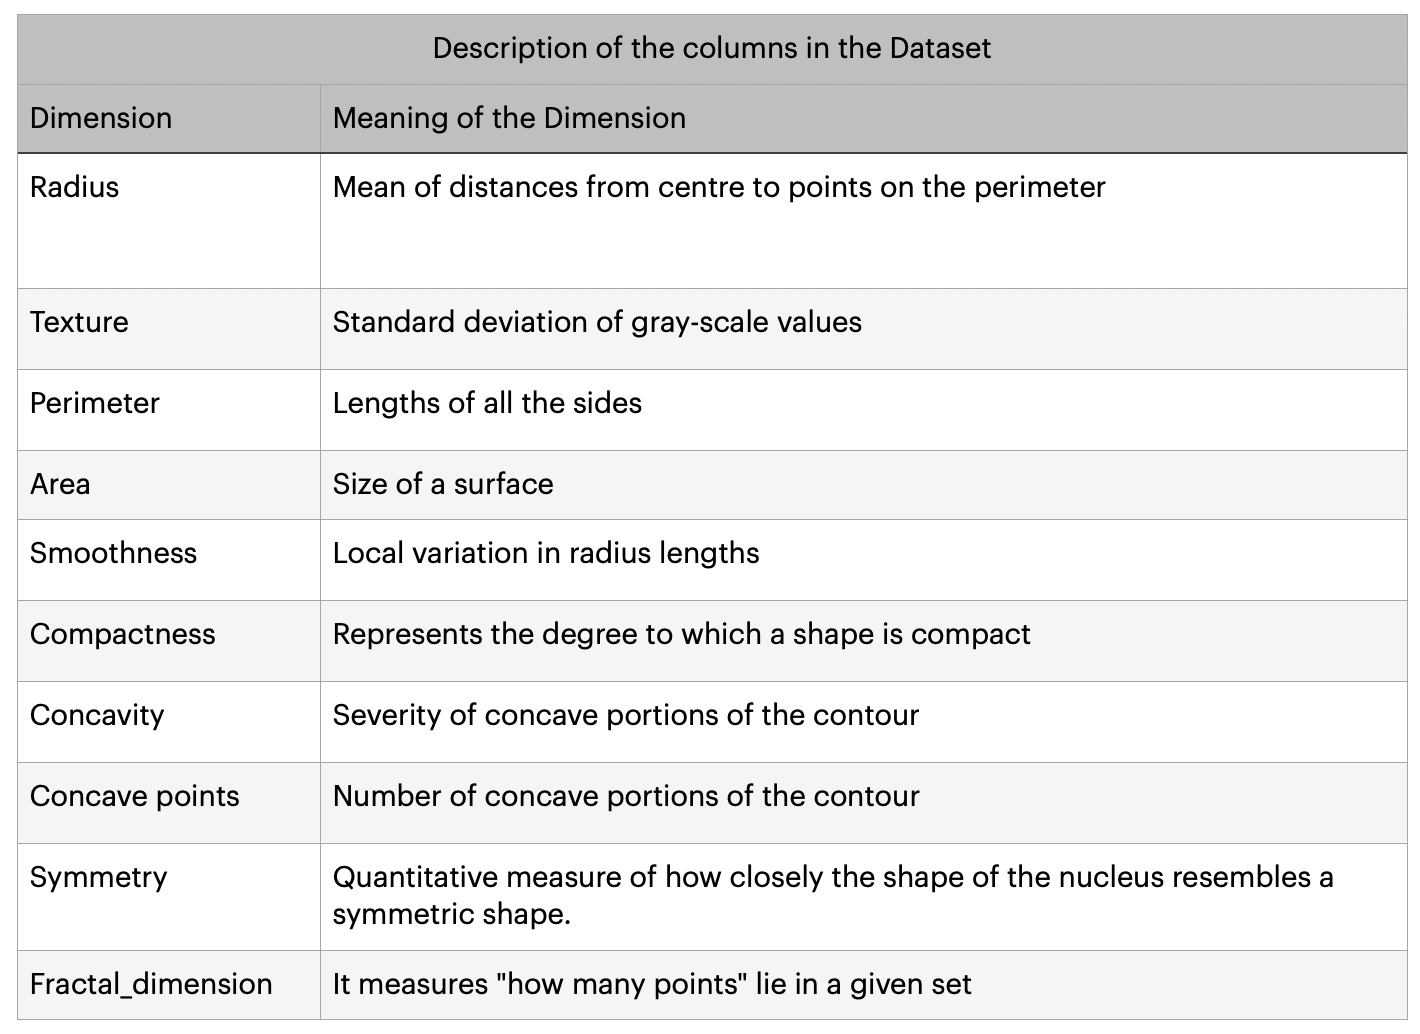

*Note: The mean, standard error (se) and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.


Data type:
The dataset contains several numerical features describing different measurements, a categorical target variable ("diagnosis"), and an additional column of unknown purpose.

In [7]:
#EDA
# Display the first few rows of the dataset
data.head()

# Check the data types of each column
print(data.dtypes)

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

(b) Data Duplicates

In this case, since the answer is 0, it means that there are no duplicate rows in the DataFrame 'data' based on the entire row.

In [10]:
duplicates = data.duplicated()
duplicates.sum()

0

(c) Number of data points

There are 569 data points in the dataframe. With 31 columns exculding the target variable, i.e diagnosis.

In [18]:
# Number of data points
num_data_points = data.shape[0]
print("Number of data points:", num_data_points)

# Number of dimensions
num_dimensions = data.shape[1] - 1  # Exclude the target variable
print("Number of dimensions:", num_dimensions)

Number of data points: 569
Number of dimensions: 32


(d) Null data points

'Unnamed: 32' column is that has null values, therefore we drop the column.

In [11]:
#Remove the last empty column
data = data.drop(['Unnamed: 32'],axis = 1)

(e) Range of each dimension

The code below calculated the range of each feature.

In [12]:
# Range of each dimension
dimension_ranges = data.iloc[:, 2:].max() - data.iloc[:, 2:].min()
print("Range of each dimension:")
print(dimension_ranges)

Range of each dimension:
radius_mean                  21.129000
texture_mean                 29.570000
perimeter_mean              144.710000
area_mean                  2357.500000
smoothness_mean               0.110770
compactness_mean              0.326020
concavity_mean                0.426800
concave points_mean           0.201200
symmetry_mean                 0.198000
fractal_dimension_mean        0.047480
radius_se                     2.761500
texture_se                    4.524800
perimeter_se                 21.223000
area_se                     535.398000
smoothness_se                 0.029417
compactness_se                0.133148
concavity_se                  0.396000
concave points_se             0.052790
symmetry_se                   0.071068
fractal_dimension_se          0.028945
radius_worst                 28.110000
texture_worst                37.520000
perimeter_worst             200.790000
area_worst                 4068.800000
smoothness_worst              0.151430


(f) Quality of the data

Performed additional checks for missing and duplicate values in the DataFrame. By conducting these checks the goal is to assess the data's completeness and identify any potential inconsistencies. 

In [13]:
# Quality of the data
data_quality = data.isnull().sum().sum()  # Check for missing values
if data_quality == 0:
    print("Data quality: Good")
else:
    print("Data quality: Poor (contains missing values)")

# Possible data quality/integrity issues
data_quality_issues = data.duplicated().sum()  # Check for duplicated rows
if data_quality_issues > 0:
    print("Possible data quality/integrity issues: Duplicated rows present")
else:
    print("Possible data quality/integrity issues: None")

Data quality: Good
Possible data quality/integrity issues: None


In [ ]:
#Replace abbreviation
data['diagnosis'] = data['diagnosis'].replace('M','Malignant')
data['diagnosis'] = data['diagnosis'].replace('B', 'Benign')

(g) Pie Chart

Checking the distribution of the target variable, i.e diagnosis.
Here we can see that Benign is 62.7% and Malignant is 37.3%.

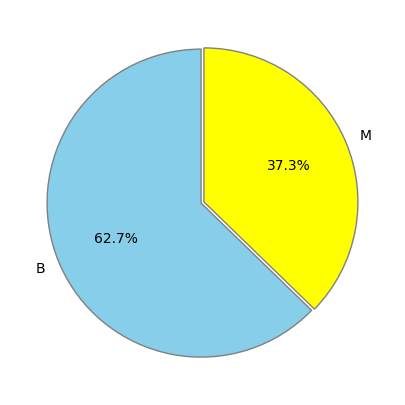

In [14]:
(h) #Visualize the predicted column
values = data['diagnosis'].value_counts()
cancer_labels = values.index.tolist()

fig, ax = plt.subplots(figsize = (10,5))
plt.pie(values,labels = cancer_labels, explode = (0.01, 0.01), colors = ("skyblue", "yellow"),
        wedgeprops={'edgecolor':'grey'},startangle=90, autopct='%1.1f%%')
plt.show()

#### (h) Section analysis

Dataset has the following characteristics:

- All feature values are recorded with four significant digits


- The dataset has a total of 569 data points (samples) and 32 dimensions (features)


- The last column which is  Unnamed: 32  has null values


- All independent features are numerical


- There are no duplicates in the data


- The dataset does not appear to have any data quality or integrity issues


- The mean, standard error (se) and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius


- The "diagnosis" column is later replaced to use the full words "Malignant" and "Benign" instead of the abbreviations


- The pie chart below shows the ratio of Benign as 62.7% and Malignant as 37.3%


- Range of the various dimensions is mentioned below:

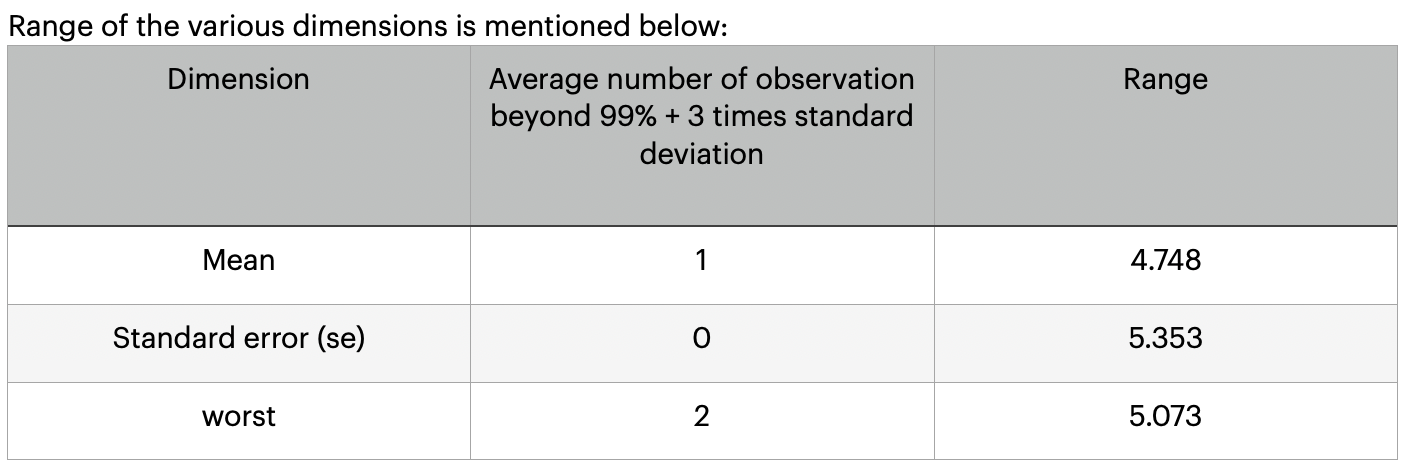

#### 4. Phase 3A: Select three dimensions that could be used as predictors and a fourth dimension as predicted

Three Dimensions were chosen from all the dimensions to feed the prediction algorithm. They were selected using the following techniques:

#### 1. Mutual Information Gain

The dimensions having the highest Mutual Information Gain for each dimension is selected.

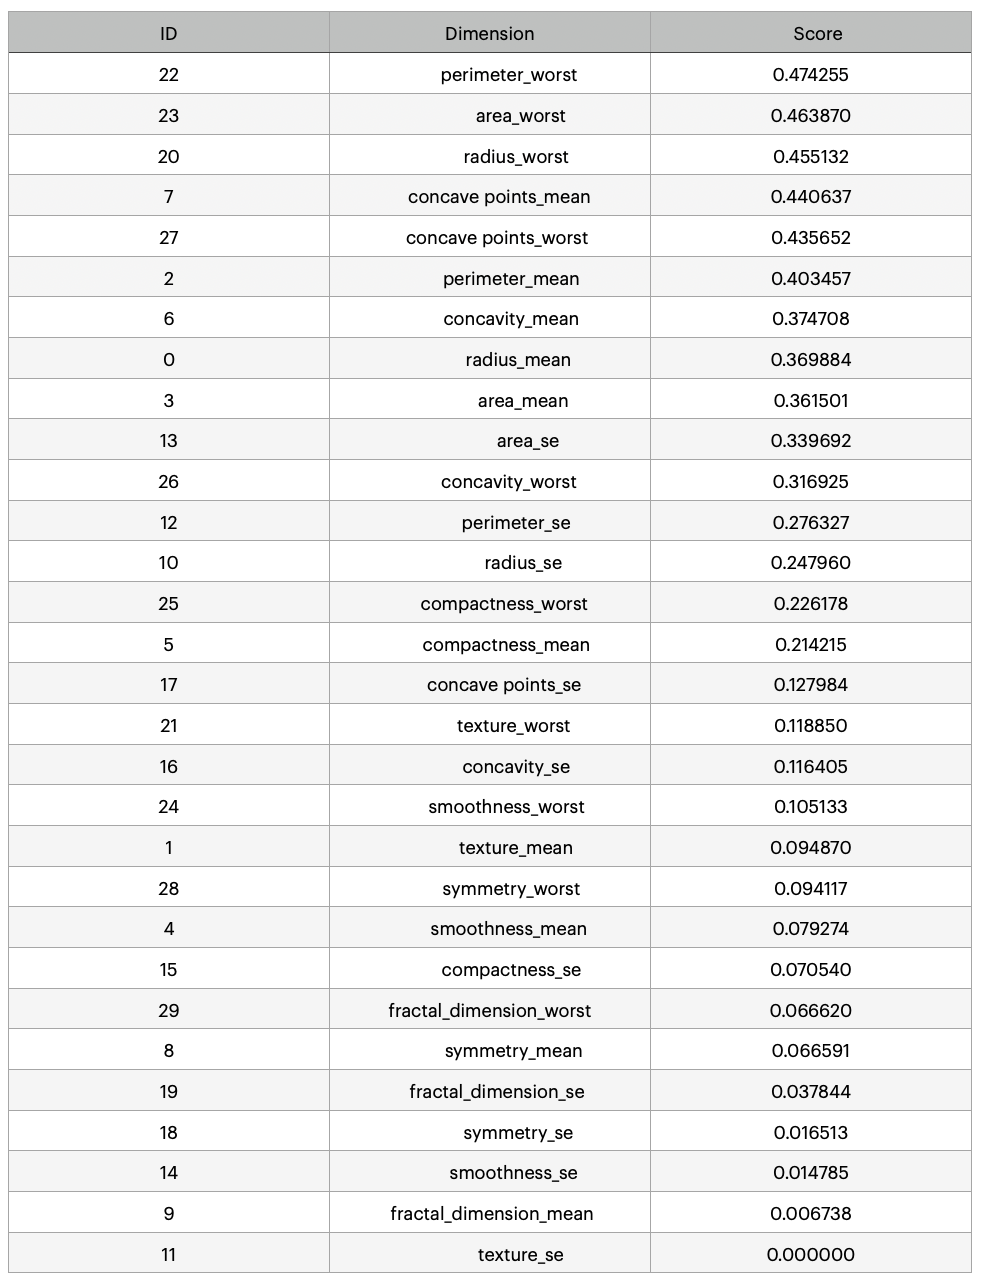

*Note: Just for reference the code below plots Mutual Information Gain. For further analysis the 'Tabular Mutual Information Gain' will be used.

/Users/darshanag/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Tabular Mutual Information Gain
                    Feature     Score
22          perimeter_worst  0.476508
23               area_worst  0.465316
20             radius_worst  0.456546
7       concave points_mean  0.440184
27     concave points_worst  0.437401
2            perimeter_mean  0.400376
6            concavity_mean  0.373213
0               radius_mean  0.366280
3                 area_mean  0.361515
13                  area_se  0.340103
26          concavity_worst  0.317303
12             perimeter_se  0.275248
10                radius_se  0.248224
25        compactness_worst  0.226892
5          compactness_mean  0.212430
17        concave points_se  0.124114
21            texture_worst  0.119042
16             concavity_se  0.117957
24         smoothness_worst  0.105372
28           symmetry_worst  0.093352
1              texture_mean  0.092847
4           smoothness_mean  0.083462
15           compactness_se  0.074951
29  fractal_dimension_worst  0.069359
8             symm

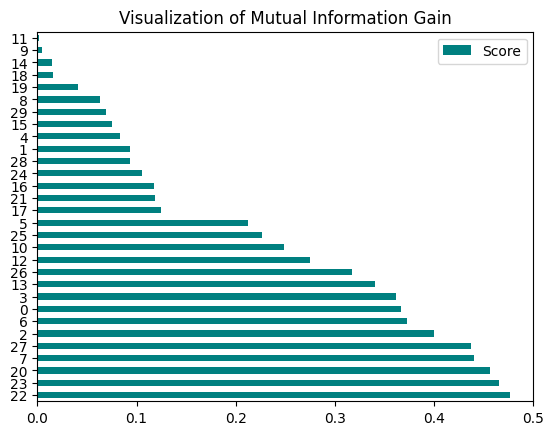

In [28]:
#Mutual information gain for each feature

# Separate features and target variable
X = data.drop(['id','diagnosis'], axis=1)
y = data[['diagnosis']]

# Encode the target variable (M=1, B=0)
le = LabelEncoder()
y = le.fit_transform(y)

# Perform feature selection using mutual_info_classif
mutual_info = mutual_info_classif(X, y)

# Create a dataframe to store feature scores
feature_score = pd.DataFrame({'Feature': X.columns, 'Score': mutual_info})

# Sort the features by score in descending order
feature_score = feature_score.sort_values('Score', ascending=False)

# Print the feature scores
print('Tabular Mutual Information Gain')
print(feature_score)

fig = feature_score[['Feature', 'Score']]
fig.plot(kind='barh', color='teal')

plt.title("Visualization of Mutual Information Gain")
plt.show()

Using mutual information gain below are the dimensions selected for further analysis: 

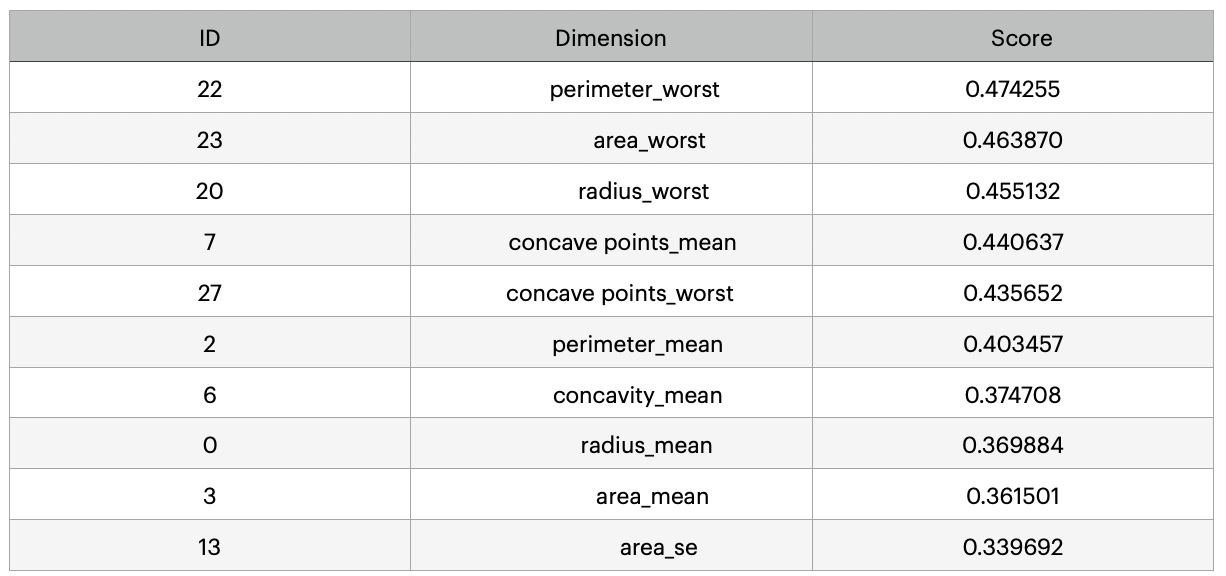



#### 2. VarianceThreshold 

Dimensions with zero variance are rejected.

In [30]:
#Variance threshold for each feature

v_threshold = VarianceThreshold(threshold=0)
v_threshold.fit(X)
variance_result = pd.DataFrame({'Feature': X.columns, 'Has Variance': v_threshold.get_support()})

print(variance_result)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])


Features with zero variance or very low variance indicate that they have constant values or almost constant values across all samples. Such features do not provide any useful information for distinguishing between different samples or classes.


Since all the elements in the resulting array are True, this suggests that all the dimensions in the dataset have non-zero variance. In other words, there are no dimensions with zero variance in this dataset. Therefore below are the dimensions considered for further analysis.

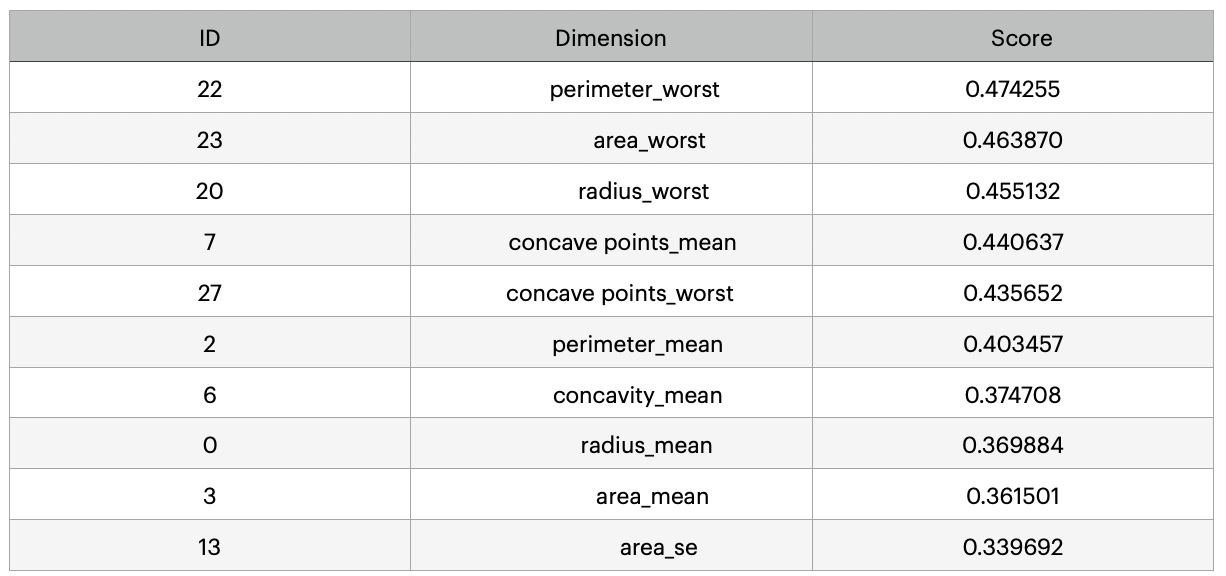

#### 3. Correlation matrix
Dimensions which are highly correlated are dropped.


In [ ]:
#Correlation matrix
corr = data.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(21, 19))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap="Reds", center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .50})

Notice that there are multicollinearity in the heatmap.  Multicollinearity refers to a situation where two or more predictor variables in a dataset are strongly correlated with each other. This high correlation can cause problems in classification models. Therefore we drop the predictor variables that are highly correlated.

Here 'perimeter_worst', 'area_worst' and 'radius_worst' are highly correlated, so only 'radius_worst' is selected while dropping 'perimeter_worst' and 'area_worst'.


Again i find that 'perimeter_mean', 'concavity_mean', 'radius_mean' and 'area_mean' are highly correlated, so only 'perimeter_mean' is selected while dropping all others.

The selected dimensions are 'radius_worst', 'perimeter_mean', 'area_se'.

#### 5. Phase 3B: Visualise the values of the predictor dimensions and the predicted dimension.

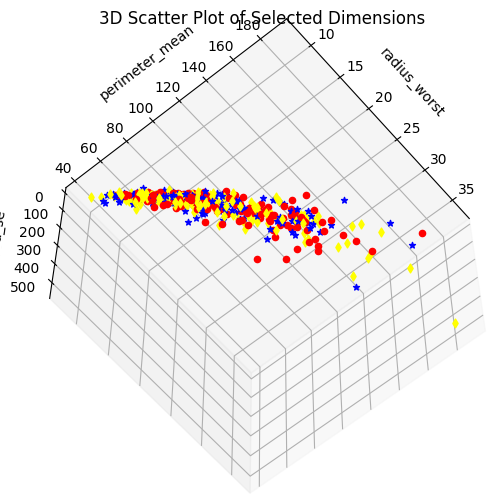

In [38]:
#3D Scatter Plot of Selected Dimensions
selected_features = ['radius_worst', 'perimeter_mean', 'area_se']
X = data[selected_features].values

# Create a 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plotting the data points with different colors and markers
colors = ['red', 'blue', 'yellow']
markers = ['o', '*', 'd']

for i in range(X.shape[0]):
    x = X[i, 0]
    y = X[i, 1]
    z = X[i, 2]
    
    color_index = i % len(colors)
    marker_index = i % len(markers)
    
    ax.scatter(x, y, z, c=colors[color_index], marker=markers[marker_index])

# Set labels and title
ax.set_xlabel('radius_worst')
ax.set_ylabel('perimeter_mean')
ax.set_zlabel('area_se')
ax.set_title('3D Scatter Plot of Selected Dimensions')
ax.view_init(120, -40)
# Show the plot
plt.show()


My analysis is the curve in the 3D scatter plot indicates a non-linear relationship among the selected dimensions: 'radius_worst', 'perimeter_mean', and 'area_se'. Non-linearity refers to the situation where the relationship between variables cannot be adequately represented by a straight line. The relationship among the selected dimensions is quadratic.

#### 6. Phase 3C: Predict the class of the diagnosis using the selected features.

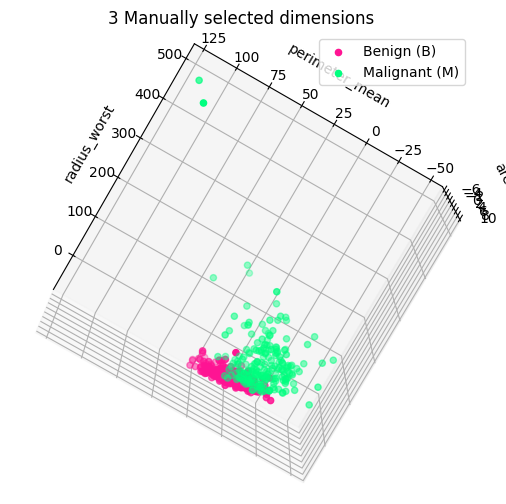

In [79]:
#PCA for manually selected features
# Assuming the dataset is stored in a DataFrame named 'df'
selected_features = ['radius_worst', 'perimeter_mean', 'area_se']
X = data[selected_features].values
y = data['diagnosis']

# Encode the target labels as integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Perform PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Create a 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')


# Scatter plot for Benign (B)
ax.scatter(
    X_pca[y_encoded == 0, 0],
    X_pca[y_encoded == 0, 1],
    X_pca[y_encoded == 0, 2],
    c='#FF1493',
    label='Benign (B)'
)

# Scatter plot for Malignant (M)
ax.scatter(
    X_pca[y_encoded == 1, 0],
    X_pca[y_encoded == 1, 1],
    X_pca[y_encoded == 1, 2],
    c='#00FF7F',
    label='Malignant (M)'
)

# Set labels and title
ax.set_xlabel('radius_worst')
ax.set_ylabel('perimeter_mean')
ax.set_zlabel('area_se')
ax.set_title('3 Manually selected dimensions')

# Set legend
ax.legend()

#Rotate plot
ax.view_init(100, -150)

# Show the plot
plt.show()

When the scatter plots of the 3 manually selected dimensions overlap each other, it indicates that the data points with different class labels (Benign and Malignant) are not clearly separable based on those dimensions alone. Maybe the selected dimensions might not capture enough discriminatory information to differentiate between the classes effectively, although we have used feature selection 
techniques. 

As the goal is the predict the fouth feature using three features we can not depend on this approach.

####  7. Phase 4: Reduction of the dimensions using PCA and prediction of class of the diagnosis

Reduction of the dimensions using PCA

PCA Loadings:
                                  PC1           PC2       PC3
radius_mean              5.086232e-03  9.287056e-03 -0.012343
texture_mean             2.196570e-03 -2.881607e-03 -0.006355
perimeter_mean           3.507633e-02  6.274808e-02 -0.071669
area_mean                5.168265e-01  8.518237e-01 -0.027894
smoothness_mean          4.236945e-06 -1.481944e-05  0.000073
compactness_mean         4.052600e-05 -2.688622e-06  0.000102
concavity_mean           8.193995e-05  7.514196e-05  0.000266
concave points_mean      4.778078e-05  4.635010e-05  0.000036
symmetry_mean            7.078043e-06 -2.524304e-05  0.000141
fractal_dimension_mean  -2.621553e-06 -1.611971e-05  0.000051
radius_se                3.137425e-04 -5.386928e-05  0.006062
texture_se              -6.509840e-05  3.483704e-04  0.006234
perimeter_se             2.236342e-03  8.196408e-04  0.043856
area_se                  5.572717e-02  7.511125e-03  0.990246
smoothness_se           -8.056460e-07  1.494381e-06  0.0

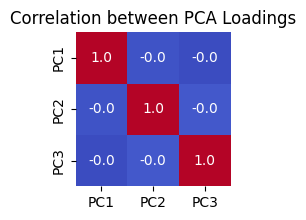

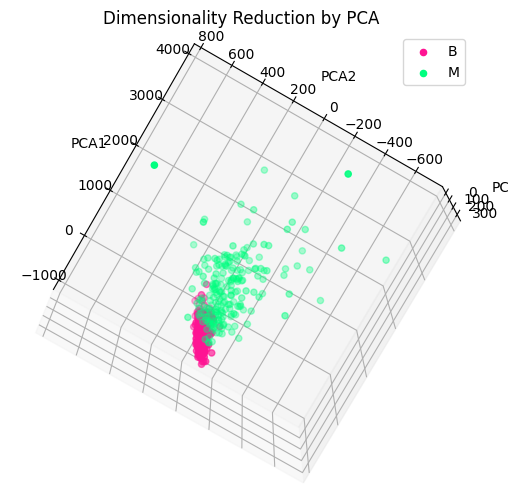

In [80]:
# Separate features and target variable
X = data.drop(["id", "diagnosis"], axis=1)
y = data["diagnosis"]

# Apply PCA with three components
pca = PCA(n_components=3)  # Adjust the number of components as needed
Y_pca = pca.fit_transform(X)

# Create a dataframe of the PCA loadings
loadings = pd.DataFrame(pca.components_.T, columns=["PC1", "PC2", "PC3"], index=X.columns)
print("PCA Loadings:")
print(loadings)

# Correlation between the extracted features
plt.figure(figsize=(2, 2))
sns.heatmap(loadings.corr(), annot=True, fmt=".1f", cmap="coolwarm", cbar=False)
plt.title("Correlation between PCA Loadings")
plt.show()

# Plotting PCA after dimensionality reduction
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plotting the reduced-dimensional data points with their corresponding class labels
colors = {"B": "#FF1493", "M": "#00FF7F"}

for label in set(y):
    indices = y == label
    ax.scatter(Y_pca[y == label, 0],
               Y_pca[y == label, 1],
               Y_pca[y == label, 2],
               label=label,
               color=colors[label])

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.set_title('Dimensionality Reduction by PCA')
ax.legend()
ax.view_init(-100, 150)

#Rotate plot
ax.view_init(100, -150)
plt.show()



The table below presents the PCA Loadings:
*Note: Since the extracted PCA loadings are in exponential notation and to express them in decimal form, I have converted the numbers accordingly and presented it below:

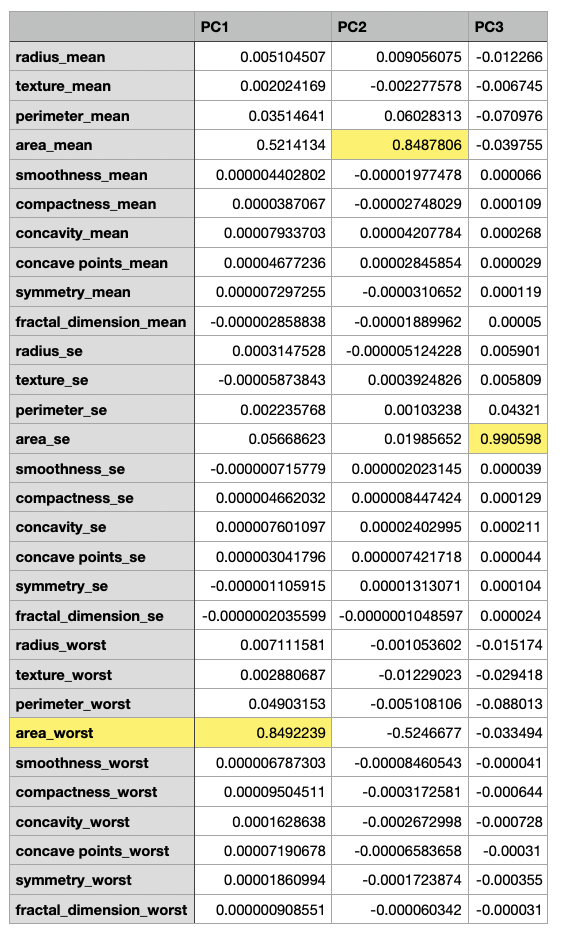

PCA works by transforming the original high-dimensional feature space into a lower-dimensional space, called principal components. Each principal component is a linear combination of the original features, and they are ordered by the amount of variance they explain in the data. The first principal component (PC1) captures the largest amount of variance, followed by PC2, PC3, and so on.

- PCA Component 1 is driven by 'area_worst'. 
- PCA Component 2 driven by 'area_mean' of the cancer cell.
- PCA Component 3 driven by 'area_se' of the cancer cell. 


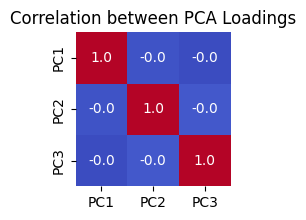


PCA (Principal Component Analysis) have a correlation of 0:
when the dimensions resulting from PCA have a correlation of 0, it indicates that the principal components are independent, allowing for a more meaningful representation of the data by capturing distinct patterns of variation. It means that they are linearly independent and do not share any common variance. In the context of PCA, it implies that the selected principal components are effectively capturing different patterns or sources of variation in the data.

#### 8. Phase 5: Compare the quality of prediction between the results of phase 3 and phase 4

(a) Comparison of variance:
Dimension reduction by manual selection vs PCA

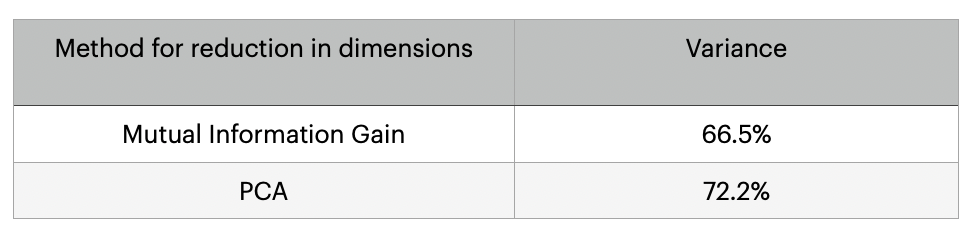

The variance measures the spread of data along the principal components. In this case, the "dimensionality reduction by PCA" approach has higher variance values compared to the Manual selection ("Mutual Information Gain, Correlation and Variance Threshold method") approach. Higher variance indicates that the selected principal components capture more information from the original dataset.

It is observed that the prediction accuracy of the method using PCA for dimension reduction is better than the selection using mutual information gain, correlation and Variance threshold. 


The three predictor dimension- 'radius_worst', 'perimeter_mean', 'area_se' are selected on the following basis:
1. High Mutual Information Gain 
2. low variance dimensions
3. least correlated dimensions 

Alternative set of dimensions that can be considered are : 
- perimeter_se, perimeter_mean, concavity_worst
- concavity_mean, concave points_worst, area_worst
- concave points_mean, perimeter_mean, radius_worst